In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("mls_salaries_masterlist.csv")
data


,club,last_name,first_name,position,base_salary,guaranteed_compensation,year,conference
0,Vancouver Whitecaps,Abdallah,Aminu,M,46500.0,46500.00,2013,Western
1,FC Dallas,Acosta,Kellyn,M,46500.0,70500.00,2013,Western
2,Vancouver Whitecaps,Adekugbe,Samuel,D,46500.0,51500.00,2013,Western
3,Toronto FC,Agbossoumonde,Gale,D,46500.0,53166.67,2013,Eastern
4,New England Revolution,Agudelo,Juan,F,145000.0,175000.00,2013,Eastern
...,...,...,...,...,...,...,...,...
10368,Vancouver Whitecaps,Scoaupssa e Silva,Caio Alexand,M,500000.0,562500.00,2022,Western
10369,Vancouver Whitecaps,Tceaibpesrt,Russell,M,400000.0,449375.00,2022,Western
10370,Vancouver Whitecaps,Vceaspeslinovic,Ranko,D,405000.0,490500.00,2022,Western
10371,Vancouver Whitecaps,Vcitaeps,Pedro,M,556000.0,609997.00,2022,Western


In [8]:
#Se eliminan los datos NA
data.isna().sum()
data.shape
data = data.dropna()
data.shape

(9382, 8)

In [9]:
Western = data[data["conference"]== "Western"]
Western

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year,conference
0,Vancouver Whitecaps,Abdallah,Aminu,M,46500.0,46500.0,2013,Western
1,FC Dallas,Acosta,Kellyn,M,46500.0,70500.0,2013,Western
2,Vancouver Whitecaps,Adekugbe,Samuel,D,46500.0,51500.0,2013,Western
6,San Jose Earthquakes,Alas,Jaime,M,90000.0,91250.0,2013,Western
8,Vancouver Whitecaps,Alderson,Bryce,M,65000.0,80000.0,2013,Western
...,...,...,...,...,...,...,...,...
10368,Vancouver Whitecaps,Scoaupssa e Silva,Caio Alexand,M,500000.0,562500.0,2022,Western
10369,Vancouver Whitecaps,Tceaibpesrt,Russell,M,400000.0,449375.0,2022,Western
10370,Vancouver Whitecaps,Vceaspeslinovic,Ranko,D,405000.0,490500.0,2022,Western
10371,Vancouver Whitecaps,Vcitaeps,Pedro,M,556000.0,609997.0,2022,Western


In [10]:
Eastern = data[data["conference"]== "Eastern"]
Eastern

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year,conference
3,Toronto FC,Agbossoumonde,Gale,D,46500.0,53166.67,2013,Eastern
4,New England Revolution,Agudelo,Juan,F,145000.0,175000.00,2013,Eastern
7,Philadelphia Union,Albright,Chris,D,75000.0,75000.00,2013,Eastern
13,New England Revolution,Alston,Kevin,D,145000.0,194000.00,2013,Eastern
16,Chicago Fire,Amarikwa,Quincy,F,46500.0,46500.00,2013,Eastern
...,...,...,...,...,...,...,...,...
10333,Toronto FC,Petrasso,Luca,D,65500.0,70012.00,2022,Eastern
10334,Toronto FC,Ranjitsingh,Gregory,G,84000.0,89167.00,2022,Eastern
10335,Toronto FC,Singh,Luke,D,84000.0,91966.00,2022,Eastern
10336,Toronto FC,Thompson,Kosi,M,65500.0,70760.00,2022,Eastern


<function matplotlib.pyplot.show(close=None, block=None)>

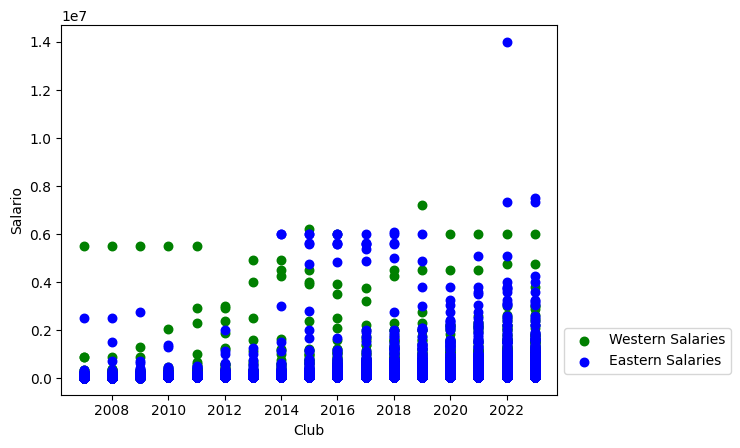

In [11]:
plt.scatter(Western["year"], Western["base_salary"],
             marker=".", s=150, color="green", label="Western Salaries")

plt.scatter(Eastern["year"], Eastern["base_salary"],
             marker=".", s=150, color="blue", label="Eastern Salaries")

plt.ylabel("Salario")
plt.xlabel("Club")
plt.legend(bbox_to_anchor=(1,0.2))
plt.show

In [12]:
#Ponemos los datos en una escala del 0-1
datos=data[["year", "base_salary"]]
clase=data[["conference"]]

escalador=preprocessing.MinMaxScaler()

datos=escalador.fit_transform(datos)
datos

array([[0.375     , 0.00240221],
       [0.375     , 0.00240221],
       [0.375     , 0.00240221],
       ...,
       [0.9375    , 0.02803297],
       [0.9375    , 0.03882863],
       [0.9375    , 0.03167919]])

In [13]:
#Creacion de modelo KNN -> valor de K
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(datos, clase)

c:\Users\becar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

c:\Users\becar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Conferencia: ['Western']
Probabilidades por conferencia [[0.33333333 0.66666667]]


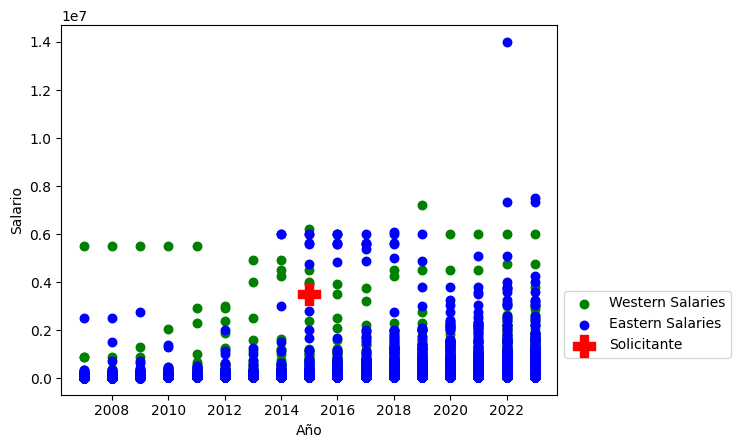

In [15]:
year = 2015
base_salary = 3500000

#Escalar los datos del nuevo solicitante
solic = escalador.transform([[year, base_salary]])

#Calcular clase y probabilidades
print("Conferencia:", clasificador.predict(solic))
print("Probabilidades por conferencia",
      clasificador.predict_proba(solic))

#Código para graficar
plt.scatter(Western["year"], Western["base_salary"],
             marker=".", s=150, color="green", label="Western Salaries")

plt.scatter(Eastern["year"], Eastern["base_salary"],
             marker=".", s=150, color="blue", label="Eastern Salaries")

plt.scatter(year, base_salary, marker="P", s=250, color="red", label="Solicitante") 
plt.ylabel("Salario")
plt.xlabel("Año")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()


In [21]:
#Datos sinténticos de todos los posibles solicitantes
base_salary = np.array([np.arange(10000000, 60001000, 100000)]*9382).reshape(1, -1)
year = np.array([np.arange(2008, 2023)]*9382).reshape(1, -1)
todos = pd.DataFrame(np.stack((year, base_salary), axis=2)[0],
        columns=["year", "base_salary"])

#Escalar los datos
solicitantes = escalador.transform(todos)

#Predecir todas las clases
clases_resultantes = clasificador.predict(solicitantes)

#Código para graficar
plt.scatter(Western["year"], Western["base_salary"],
             marker=".", s=150, color="green", label="Western Salaries")

plt.scatter(Eastern["year"], Eastern["base_salary"],
             marker=".", s=150, color="blue", label="Eastern Salaries")

plt.ylabel("Salario")
plt.xlabel("Año")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

ValueError: all input arrays must have the same shape